In [85]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [86]:
# read the data
df = pd.read_csv('mh_dataset.csv')

In [87]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(1259, 27)
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object


In [88]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Age']


In [89]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Timestamp' 'Gender' 'Country' 'state' 'self_employed' 'family_history'
 'treatment' 'work_interfere' 'no_employees' 'remote_work' 'tech_company'
 'benefits' 'care_options' 'wellness_program' 'seek_help' 'anonymity'
 'leave' 'mental_health_consequence' 'phys_health_consequence' 'coworkers'
 'supervisor' 'mental_health_interview' 'phys_health_interview'
 'mental_vs_physical' 'obs_consequence' 'comments']


In [91]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Timestamp - 0.0%
Age - 0.0%
Gender - 0.0%
Country - 0.0%
state - 41.0%
self_employed - 1.0%
family_history - 0.0%
treatment - 0.0%
work_interfere - 21.0%
no_employees - 0.0%
remote_work - 0.0%
tech_company - 0.0%
benefits - 0.0%
care_options - 0.0%
wellness_program - 0.0%
seek_help - 0.0%
anonymity - 0.0%
leave - 0.0%
mental_health_consequence - 0.0%
phys_health_consequence - 0.0%
coworkers - 0.0%
supervisor - 0.0%
mental_health_interview - 0.0%
phys_health_interview - 0.0%
mental_vs_physical - 0.0%
obs_consequence - 0.0%
comments - 87.0%


In [92]:
# state, comments and work interfere has a lot of missing.
# If we want to drop.
cols_to_drop = ["comments","state"]
df = df.drop(cols_to_drop, axis=1)

In [93]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: self_employed
imputing missing values for: work_interfere


27.0
35.0
8.0
15.0 47.0


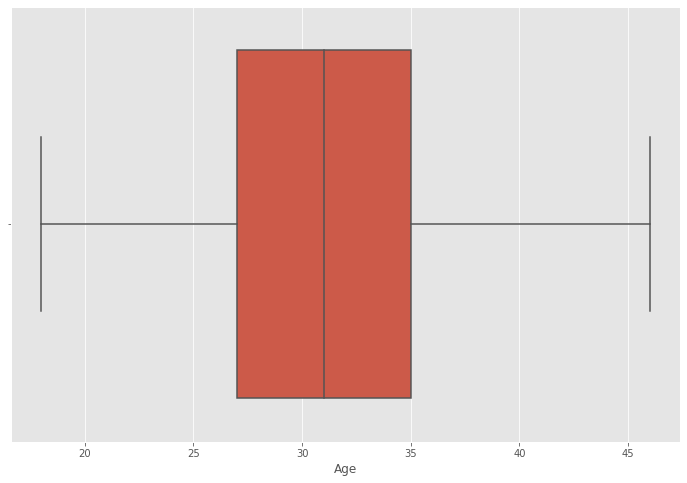

In [95]:
#Cleaning ogf Age
Q1=df["Age"].quantile(0.25)
Q3=df["Age"].quantile(0.75)
IQR= (Q3-Q1)
print(Q1)
print(Q3)
print(IQR)

Youngest = Q1-(1.5*IQR)
Eldest = Q3+(1.5*IQR)
print(Youngest, Eldest)
df = df[df["Age"]< Eldest]
df= df[df["Age"]> Youngest]

# box plot for Age
sns.boxplot(data=df,x=df["Age"])

In [96]:
#To describe just the numerical columns 
df.describe(include = [np.number])


,Age
count,1207.000000
mean,31.302403
std,6.080896
min,18.000000
25%,27.000000
50%,31.000000
75%,35.000000
max,46.000000


In [97]:
#To describe on just the objects (strings) 
df.describe(include = ['O'])

,Timestamp,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1207,1207,1207,1207,1207,1207,1207,1207,1207,1207,...,1207,1207,1207,1207,1207,1207,1207,1207,1207,1207
unique,857,45,45,2,2,2,4,6,2,2,...,3,5,3,3,3,3,3,3,3,2
top,27-08-2014 15:23,Male,United States,No,No,Yes,Sometimes,Jun-25,No,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,8,593,712,1073,732,608,706,284,856,987,...,786,540,471,897,749,490,966,534,555,1038


In [99]:
df.describe(include="all")

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,self_employed_ismissing,work_interfere_ismissing
count,1207,1207.000000,1207,1207,1207,1207,1207,1207,1207,1207,...,1207,1207,1207,1207,1207,1207,1207,1207,1207,1207
unique,857,NaN,45,45,2,2,2,4,6,2,...,3,3,3,3,3,3,3,2,2,2
top,27-08-2014 15:23,NaN,Male,United States,No,No,Yes,Sometimes,Jun-25,No,...,No,No,Some of them,Yes,No,Maybe,Don't know,No,False,False
freq,8,NaN,593,712,1073,732,608,706,284,856,...,471,897,749,490,966,534,555,1038,1189,952
mean,NaN,31.302403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,6.080896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
print(df.shape)

(1207, 27)


In [104]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Timestamp - 0.0%
Age - 0.0%
Gender - 0.0%
Country - 0.0%
self_employed - 0.0%
family_history - 0.0%
treatment - 0.0%
work_interfere - 0.0%
no_employees - 0.0%
remote_work - 0.0%
tech_company - 0.0%
benefits - 0.0%
care_options - 0.0%
wellness_program - 0.0%
seek_help - 0.0%
anonymity - 0.0%
leave - 0.0%
mental_health_consequence - 0.0%
phys_health_consequence - 0.0%
coworkers - 0.0%
supervisor - 0.0%
mental_health_interview - 0.0%
phys_health_interview - 0.0%
mental_vs_physical - 0.0%
obs_consequence - 0.0%
self_employed_ismissing - 0.0%
work_interfere_ismissing - 0.0%


In [105]:
df.to_csv("mh_dataset_version_2.csv")